## Lagmuir Probe

  

<img src="https://raw.githubusercontent.com/bernardocarvalho/python-basics/main/images/Left-Schematic-of-a-single-Langmuir.png" alt="Langmuir" style="width: 150px;"/>

$I = I_i^{max} (-1 + e^{q_e (V_{pr} - V_{fl})/ (k_B T_e)})$.




In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ![](https://raw.githubusercontent.com/bernardocarvalho/python-basics/main/images/Left-Schematic-of-a-single-Langmuir.png).
# Units String
# UNITCesp = 'kJ kg\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}ºC\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}'
# Constants
C = 3.0e8 # (m/s) Velocidade da Luz
E = 1.9e-19 # (C) Elctron Charge
plt.close("all")

In [44]:
# @title Import data from csv

# Import data from csv using pandas and convert to numpy array
data = pd.read_csv(r"https://raw.githubusercontent.com/bernardocarvalho/python-basics/main/data-files/langmuir_Ne_80v_3mbar.csv", encoding='ISO-8859–1')

# data-files/langmuir_Ne_80v_3mbar.csv
voltage = data['Voltage [V]'].values
current = data['Current [?A]'].values
# data


In [45]:
data
# voltage = data['Voltage'].values
# current = data['Current'].values
Npoints = len(current)
print(f"{Npoints} data points")

865 data points


Text(0.5, 0, 'Time [a.u.]')

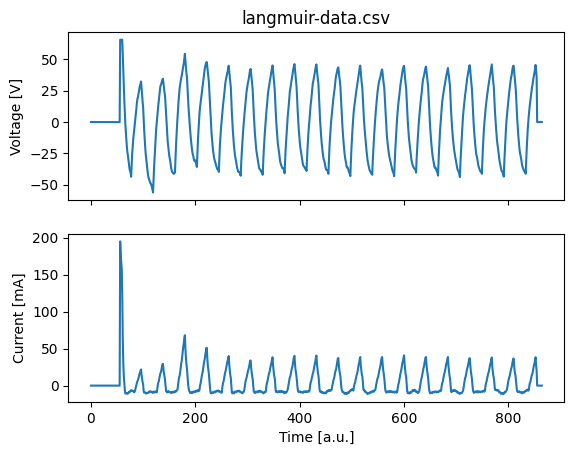

In [46]:
# Plot all data
fig, ax = plt.subplots(2, sharex=True)
ax[0].plot(voltage)
ax[1].plot(current)
ax[0].set_title(r"langmuir-data.csv")
ax[0].set_ylabel('Voltage [V]')
ax[1].set_ylabel('Current [mA]')
ax[1].set_xlabel('Time [a.u.]')


In [47]:
# @title Fit Function
def f(v, isat, vf, te):
    return isat * (1 - np.exp((v - vf) / te))

Text(0, 0.5, 'Current [mA]')

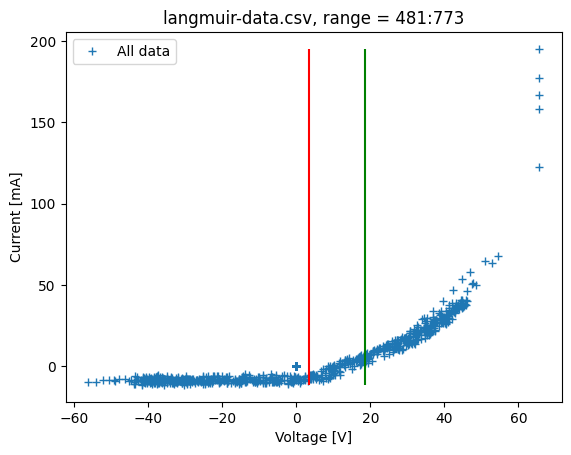

In [48]:
# @title Choose data

begin = 481 # @param {type:"slider", min:0, max:864, step:1}
end = 773 # @param {type:"slider", min:0, max:864, step:1}

chosen_voltage = voltage[begin:end]
chosen_current = current[begin:end]
Imin = current.min()
Imax = current.max()
fig1, ax1 = plt.subplots(1)
ax1.plot(voltage, current, '+', label='All data')
ax1.vlines((voltage[begin], voltage[end]), Imin, Imax, colors = ('red', 'green'))
ax1.legend()
ax1.set_title("{}, range = {}:{}".format("langmuir-data.csv", begin, end))
ax1.set_xlabel('Voltage [V]')
ax1.set_ylabel('Current [mA]')


In [49]:
# @title Fit Data
popt, pcov = curve_fit(f, chosen_voltage, chosen_current)
perr = np.sqrt(np.diag(pcov))
fitted_current = f(chosen_voltage, *popt)
rmse = np.sqrt(
    np.sum((chosen_current - fitted_current) ** 2) / (end - begin + 1))

Text(0, 0.5, 'Current [mA]')

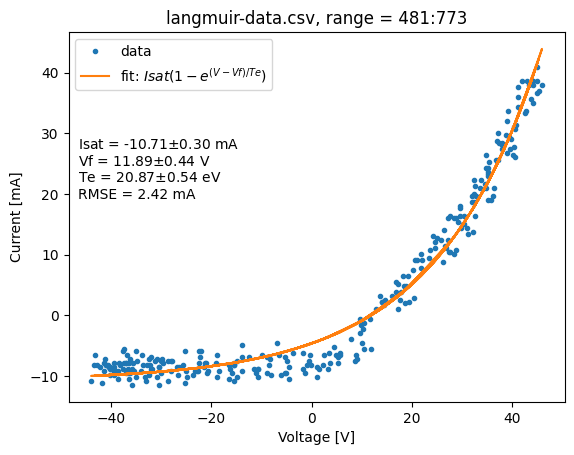

In [50]:
# Plot chosen data and fit results
pnames = ['Isat', 'Vf', 'Te']
punits = ['mA', 'V', 'eV']
results = ''
for name, value, error, units in zip(pnames, popt, perr, punits):
    results += '{} = {:.2f}$\pm${:.2f} {}\n'.format(name, value, error, units)
results += 'RMSE = {:.2f} {}'.format(rmse, punits[0])
fig2, ax2 = plt.subplots(1)
ax2.plot(chosen_voltage, chosen_current, '.', label='data')
ax2.plot(
    chosen_voltage, fitted_current,
    label='fit: ${}(1-e^{{(V - {}) / {}}})$'.format(*pnames))
ax2.legend()
ax2.annotate(results, xy=(0.02, 0.55), xycoords='axes fraction')
ax2.set_title("{}, range = {}:{}".format("langmuir-data.csv", begin, end))
ax2.set_xlabel('Voltage [V]')
ax2.set_ylabel('Current [mA]')
# plt.show(block=True)